In [1]:
import pandas as pd

df = pd.read_csv('data/heart.csv')
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Box Plot

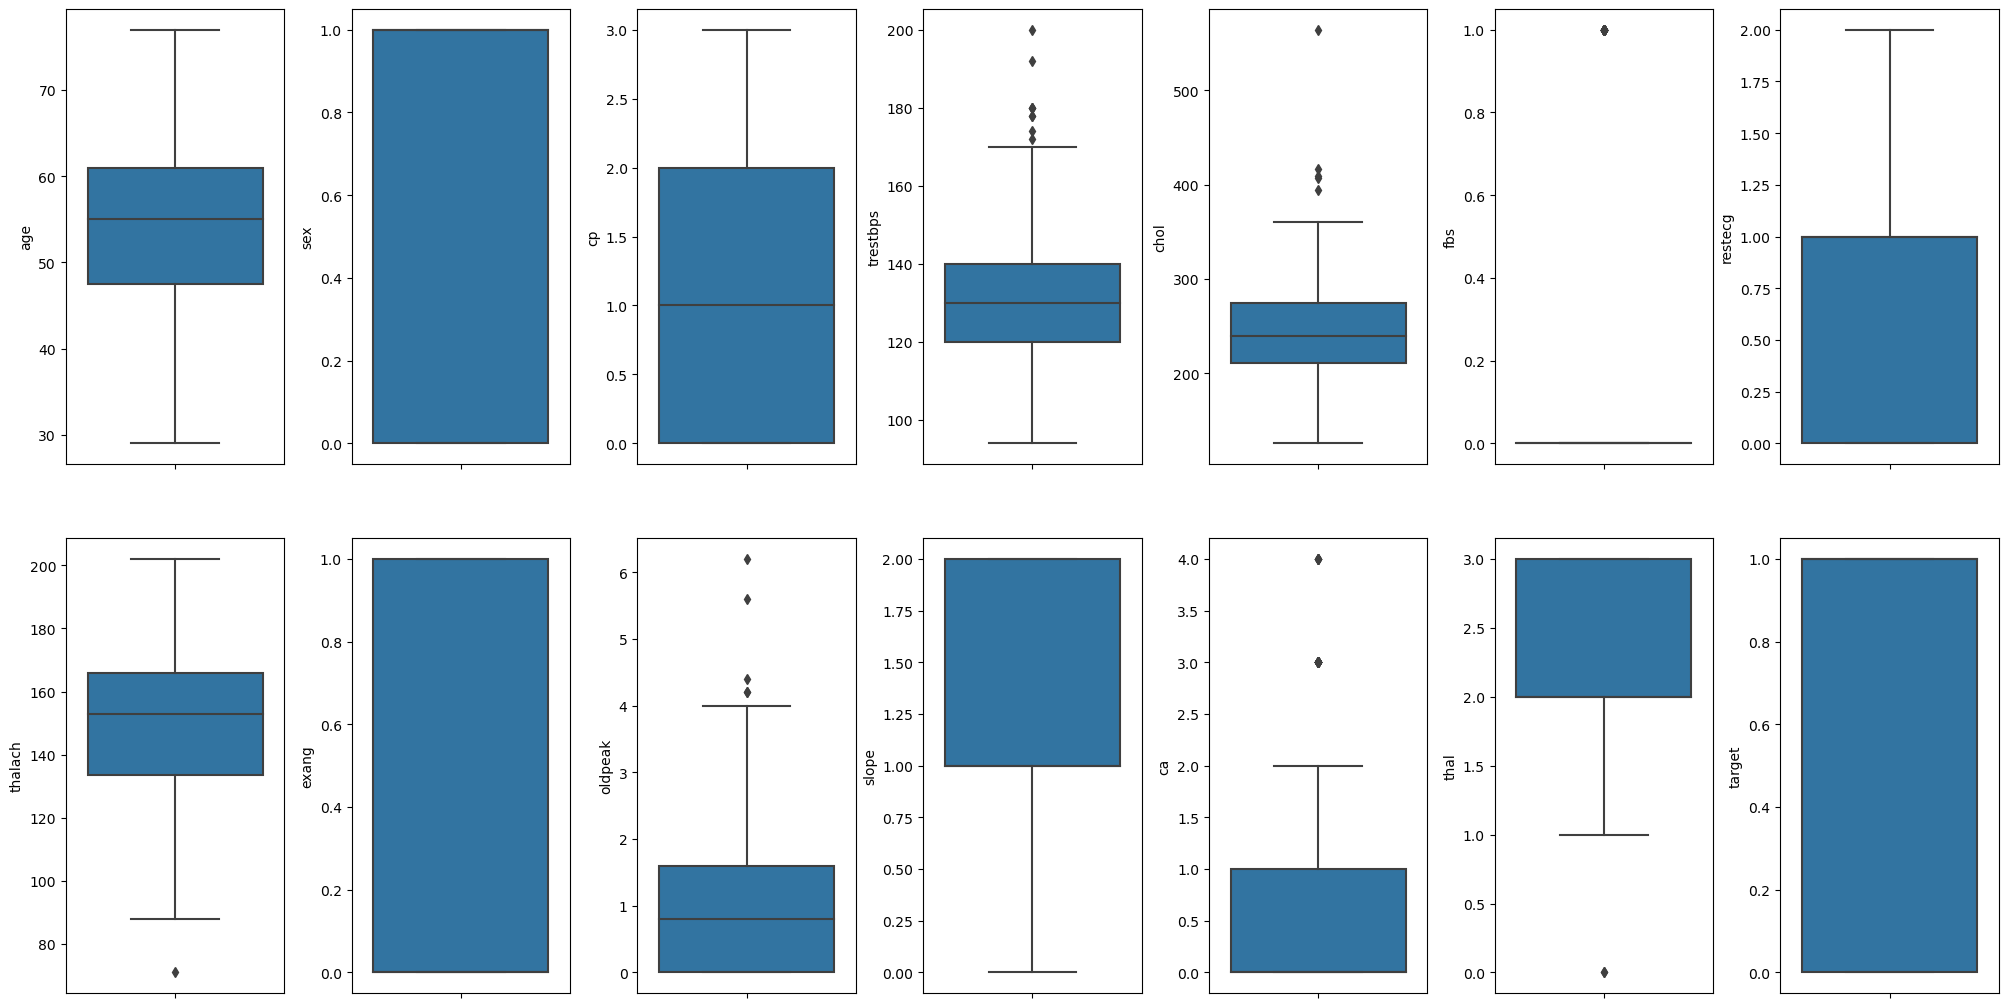

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Violin Plot

<Figure size 960x720 with 0 Axes>

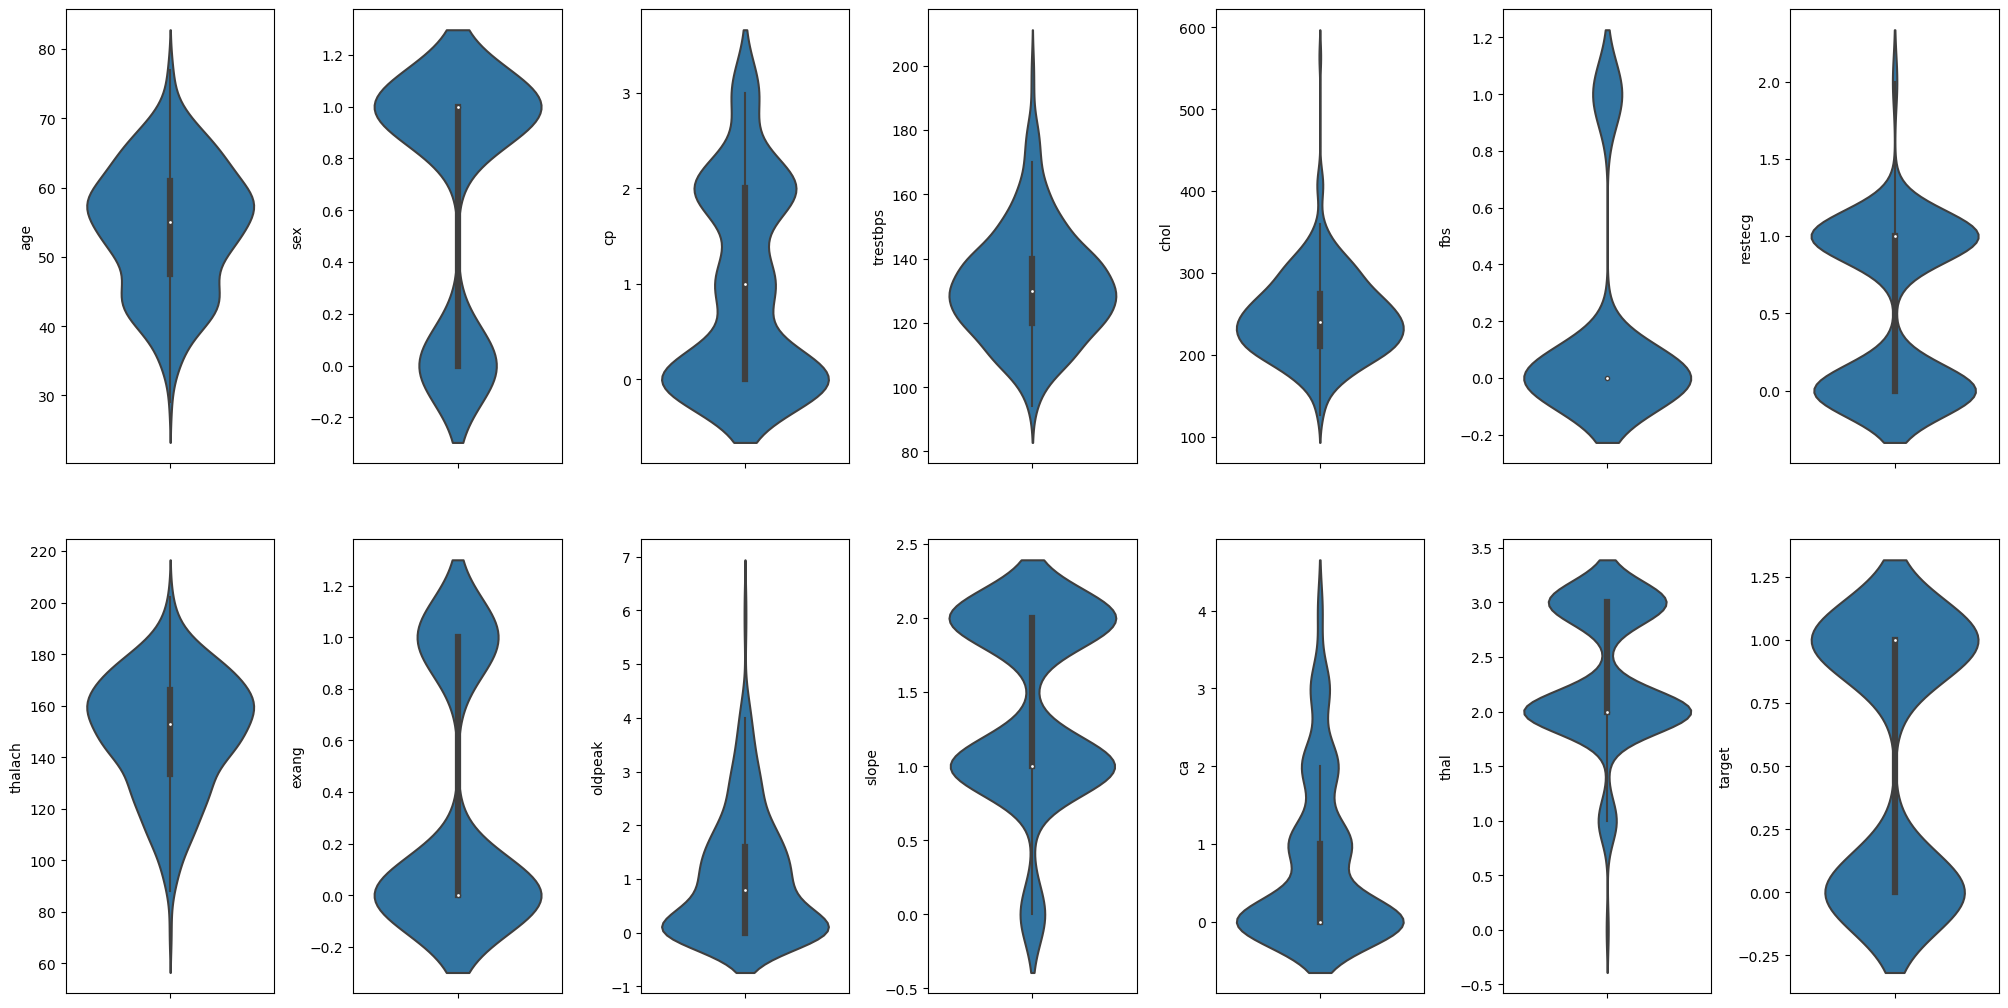

In [4]:
plt.figure(dpi=150)

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.violinplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [5]:
import numpy as np
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 0.00%
Column sex outliers = 0.00%
Column cp outliers = 0.00%
Column trestbps outliers = 4.29%
Column chol outliers = 1.65%
Column fbs outliers = 100.00%
Column restecg outliers = 0.00%
Column thalach outliers = 0.33%
Column exang outliers = 0.00%
Column oldpeak outliers = 2.64%
Column slope outliers = 0.00%
Column ca outliers = 8.25%
Column thal outliers = 0.66%
Column target outliers = 0.00%


## Histogram

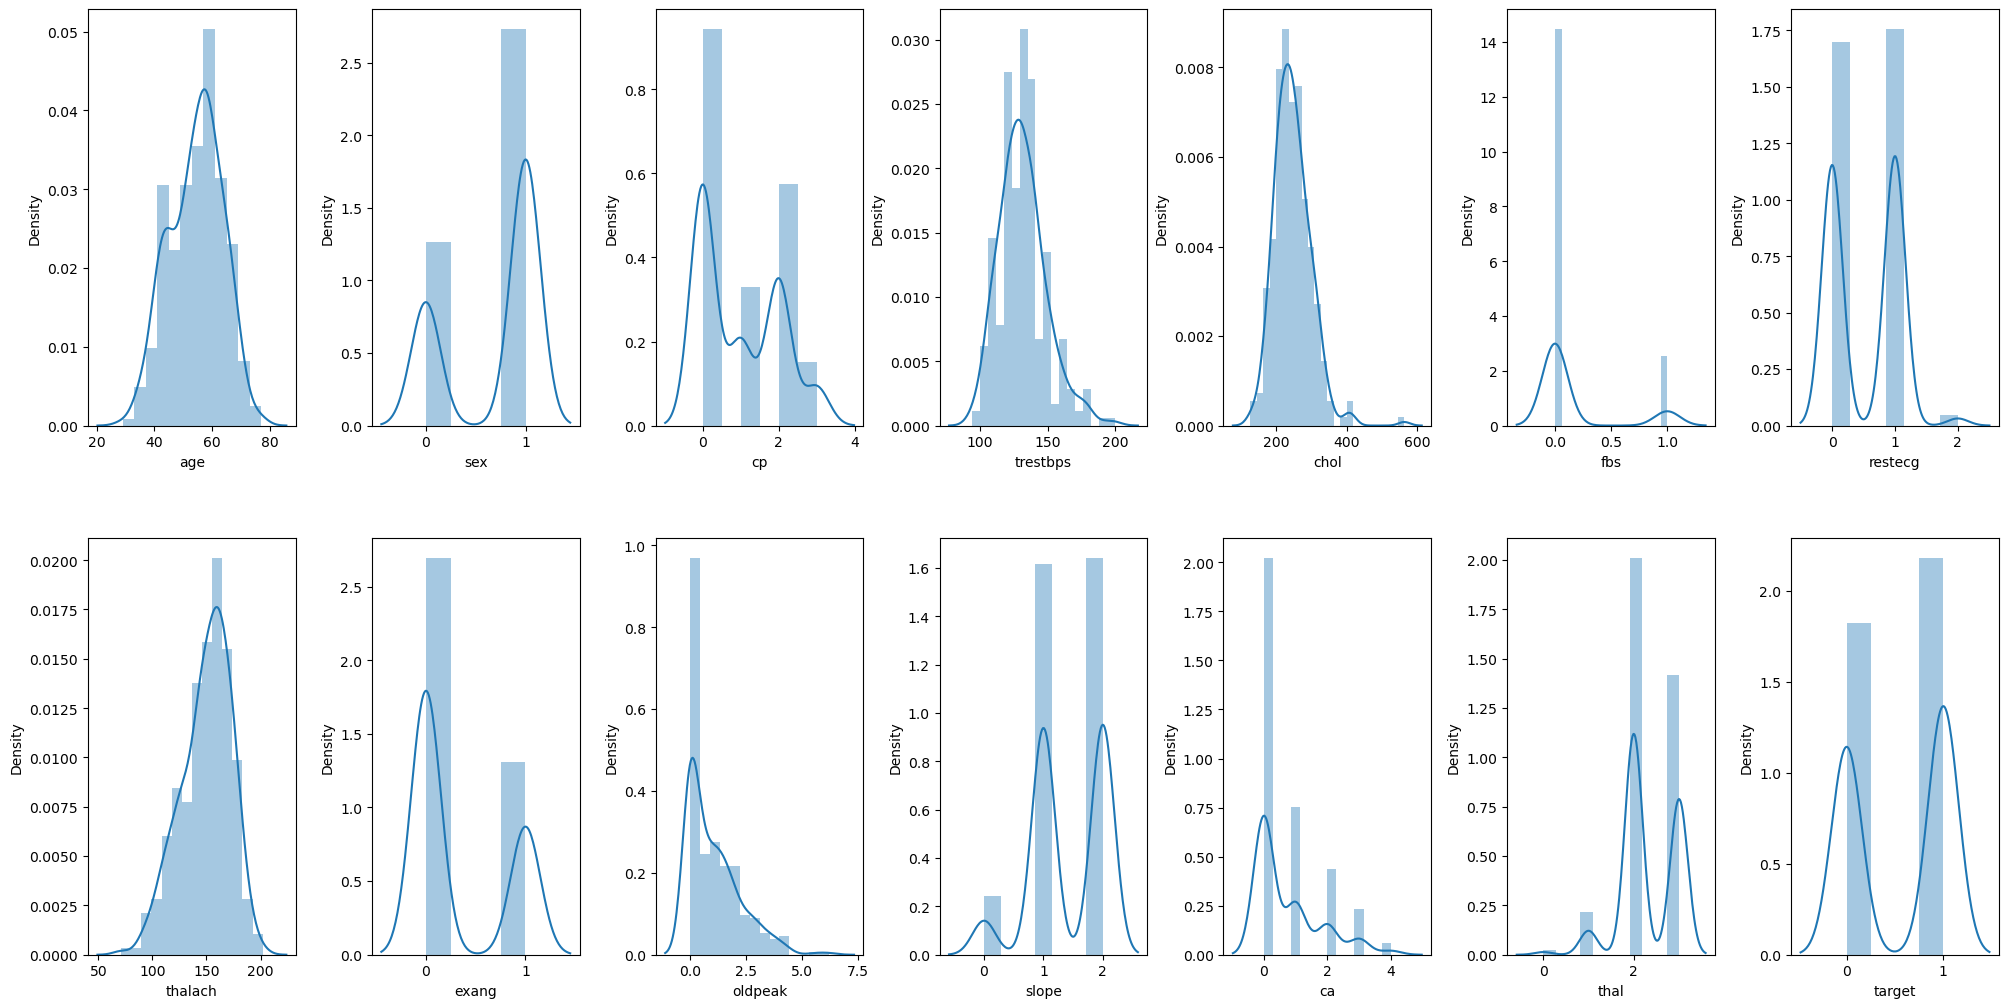

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Bidimensional histogram

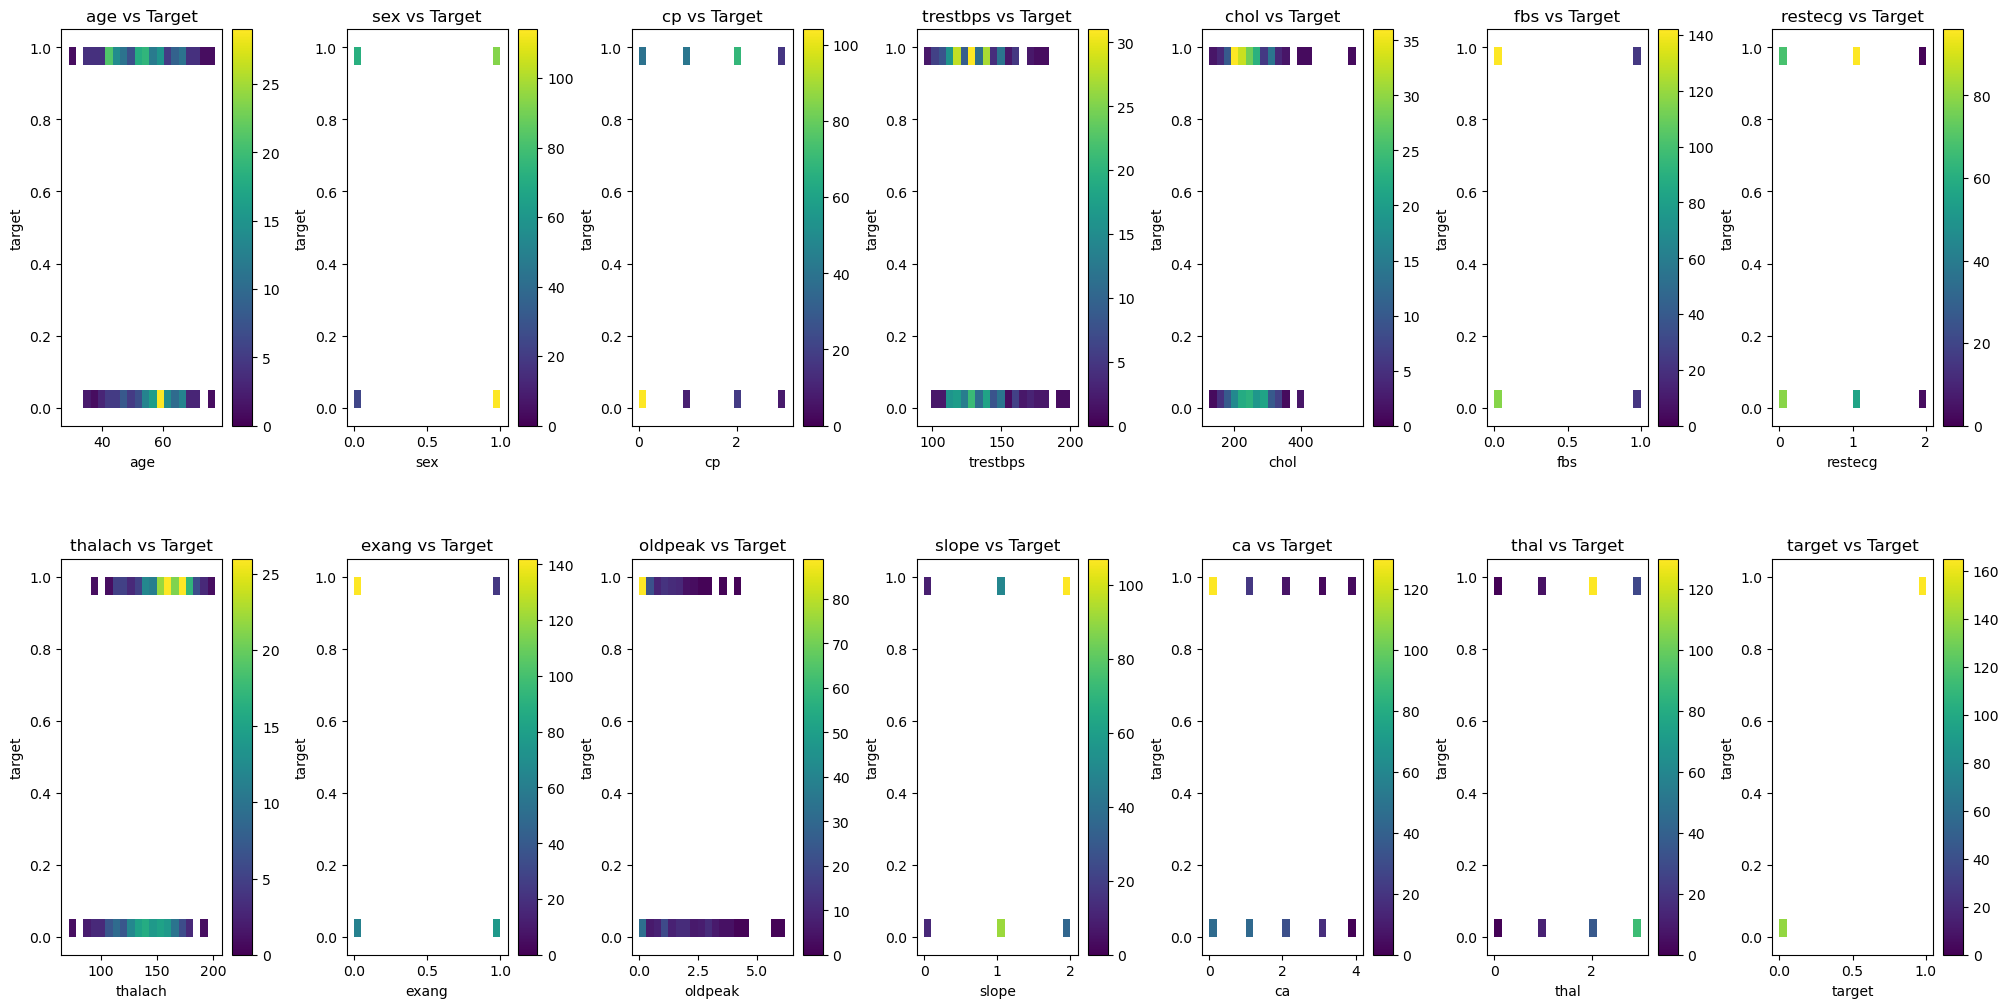

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k, v in df.items():
    sns.histplot(x=v, y=df['target'], bins=20, cbar=True, ax=axs[index], cmap='viridis')
    axs[index].set_title(f'{k} vs Target')
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## Heatmap Correlation

<Axes: >

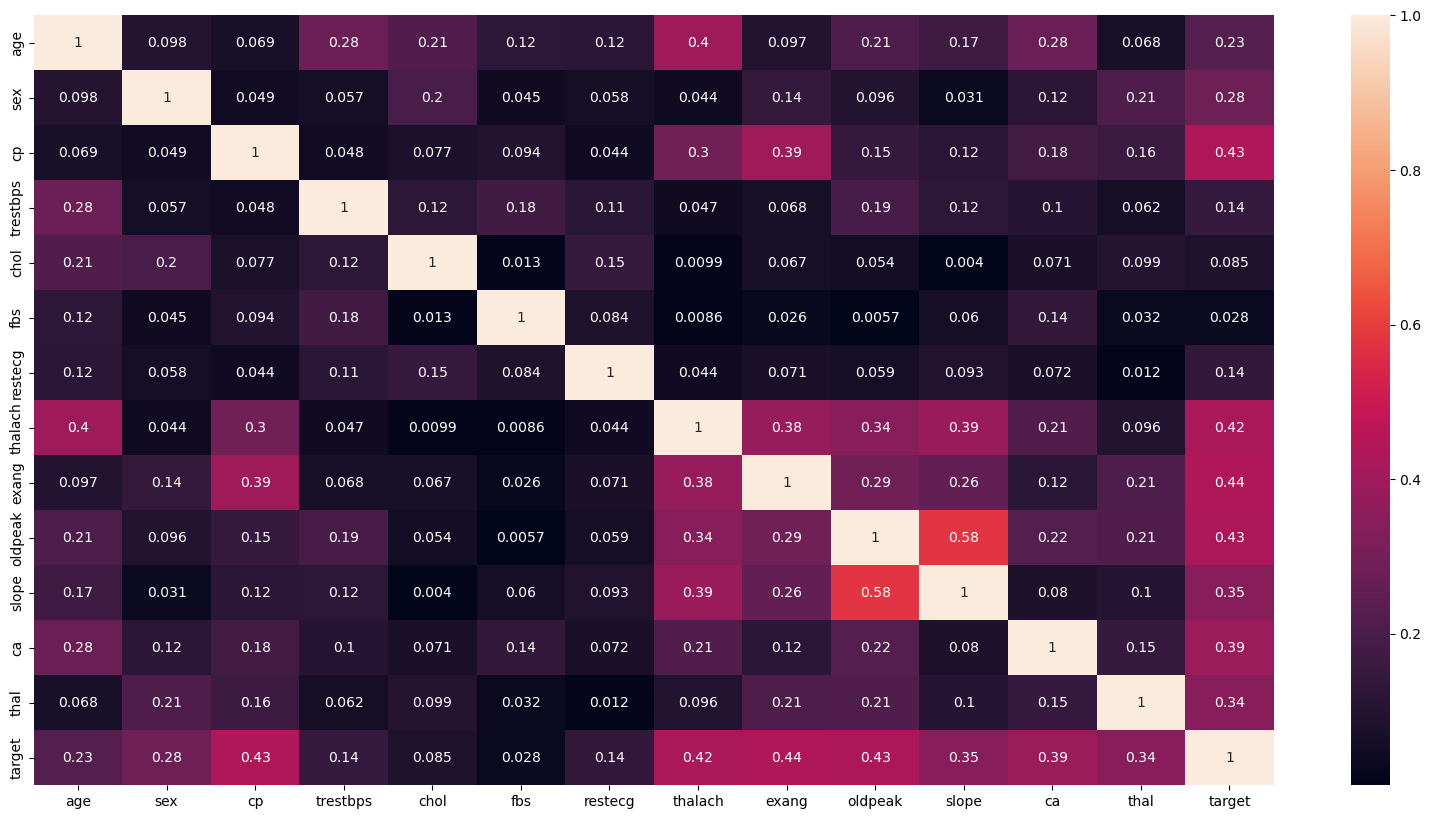

In [8]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [9]:
correlation_matrix = df.corr().abs()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)
target_correlation

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

## KDE Plot

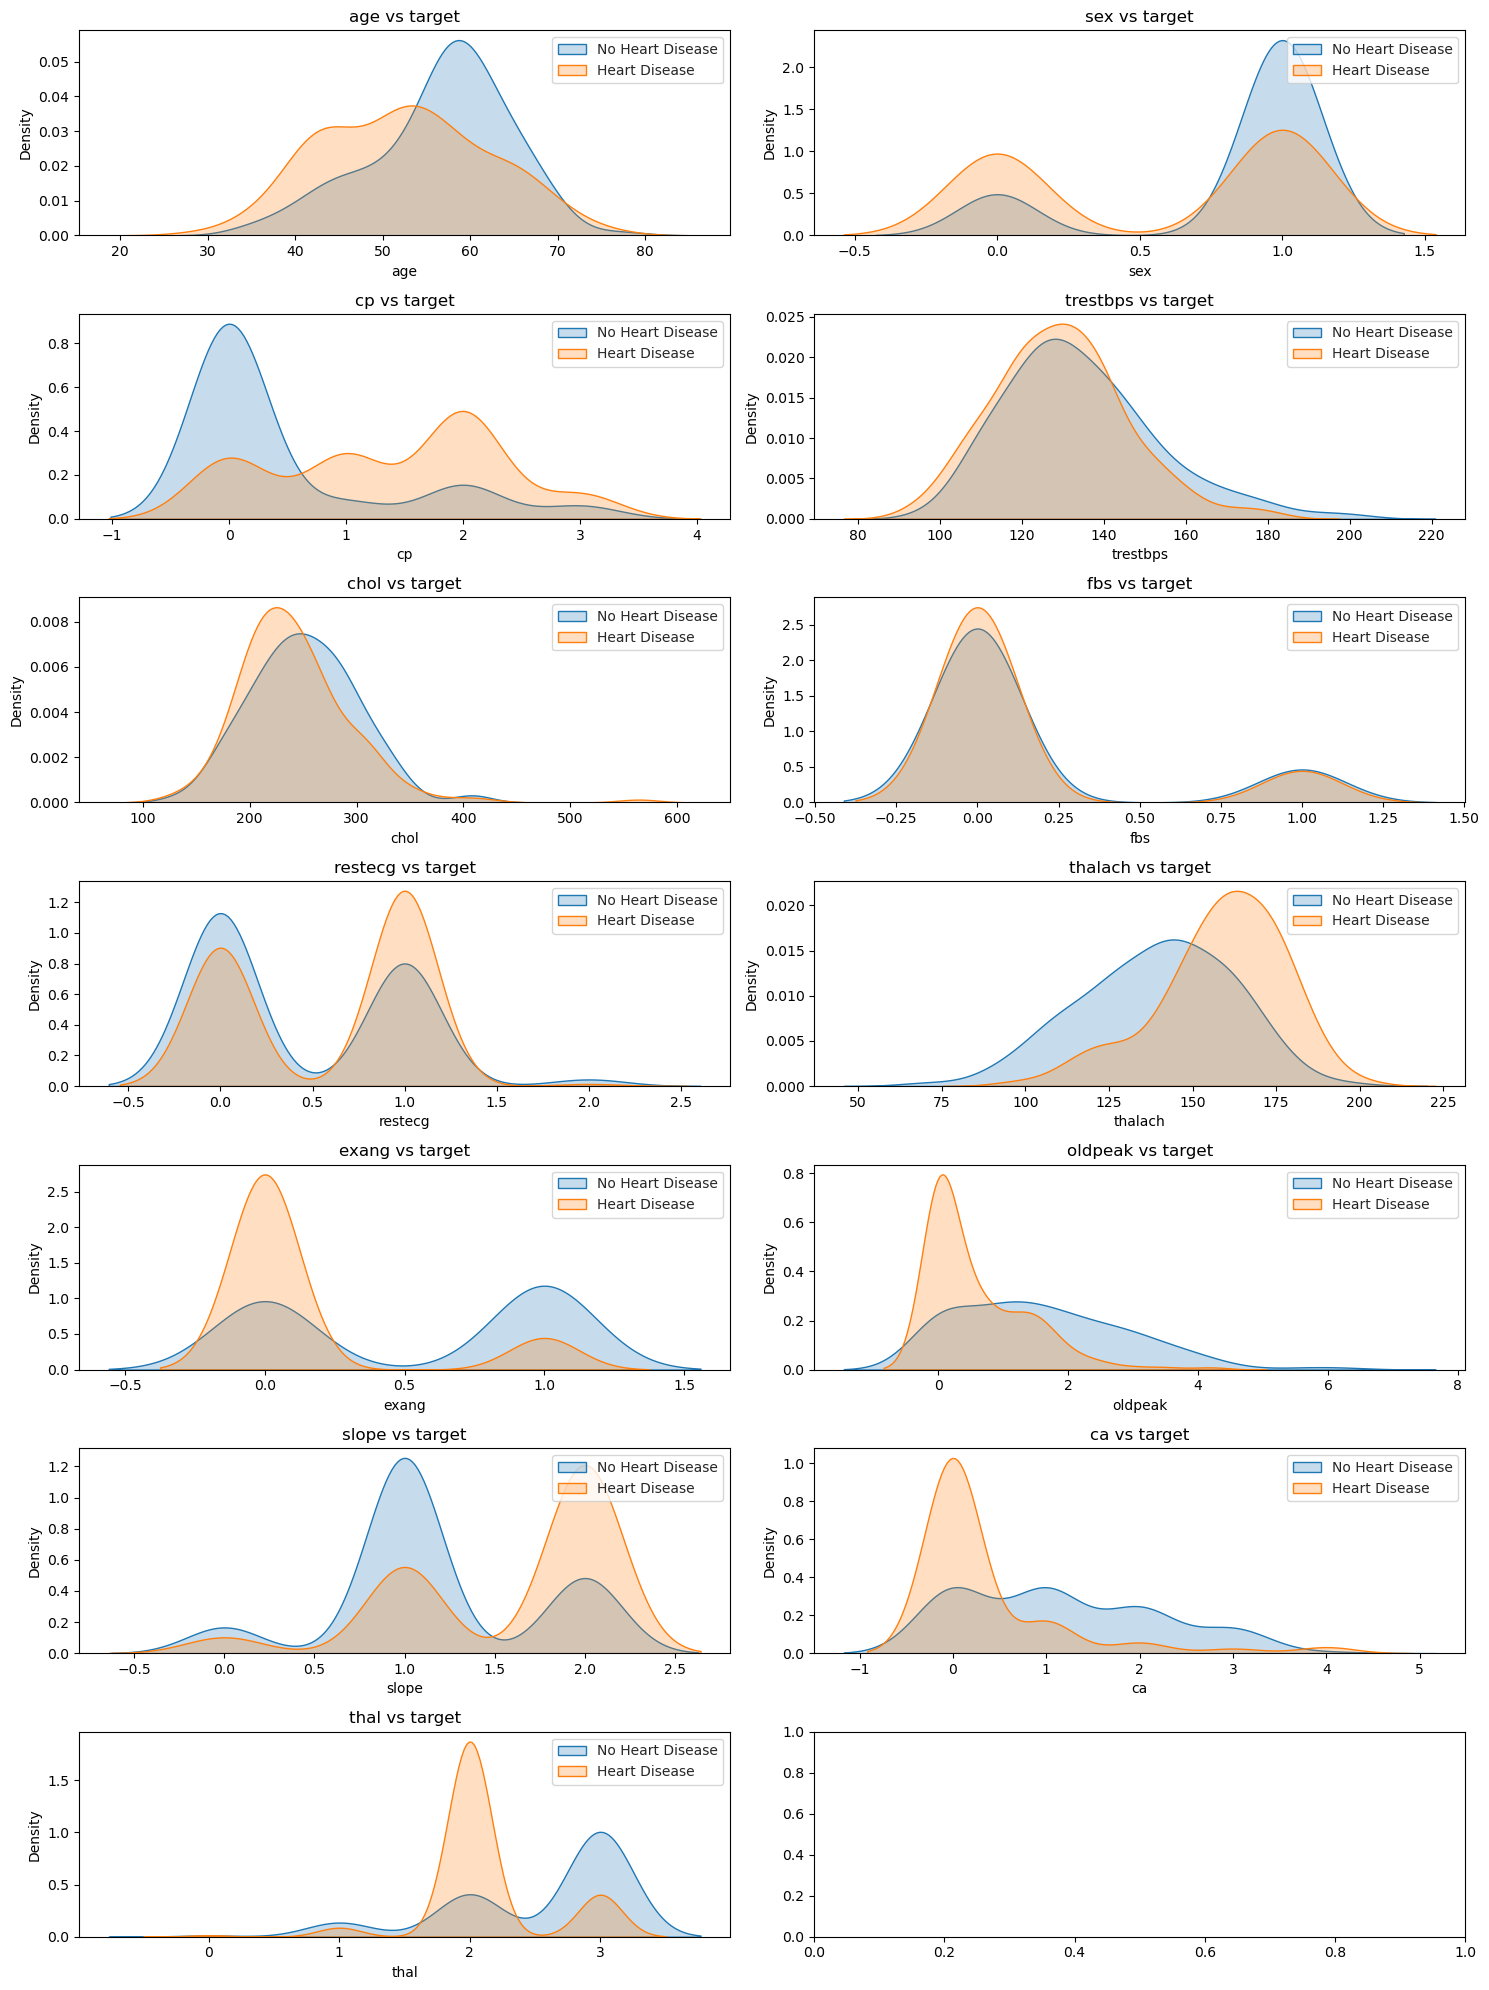

In [10]:
grid_size = (7, 2)

fig, axes = plt.subplots(*grid_size, figsize=(15, 20))

axes = axes.flatten()

columns_to_plot = df.drop('target', axis=1).columns

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, grid_size[1])

    
    with sns.axes_style('whitegrid'):
        sns.kdeplot(df.loc[df['target'] == 0, column], shade=True, label='No Heart Disease', ax=axes[i])
        sns.kdeplot(df.loc[df['target'] == 1, column], shade=True, label='Heart Disease', ax=axes[i])
        axes[i].set_title(f'{column} vs target')
        axes[i].legend()

plt.tight_layout()


plt.show()



## Bidimensional KDE

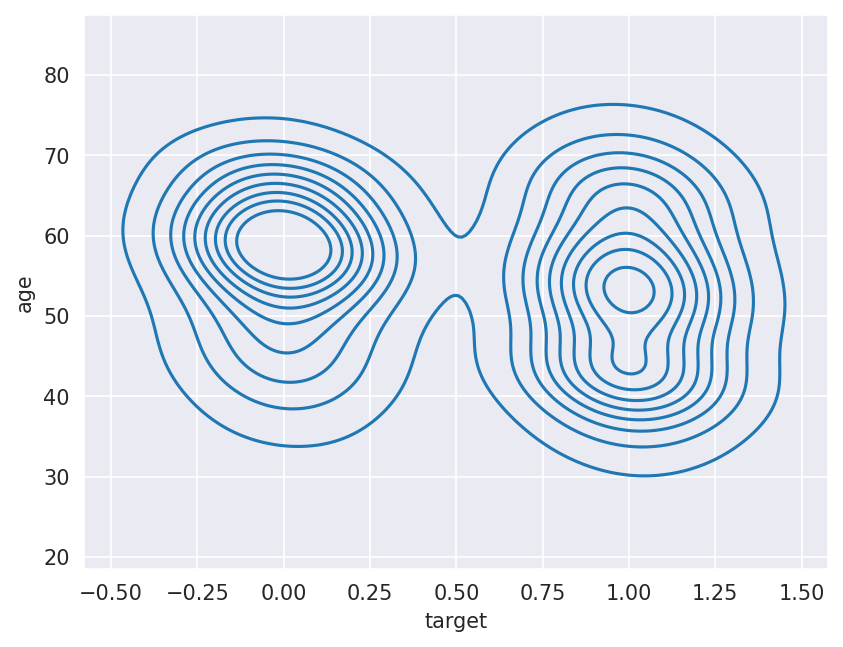

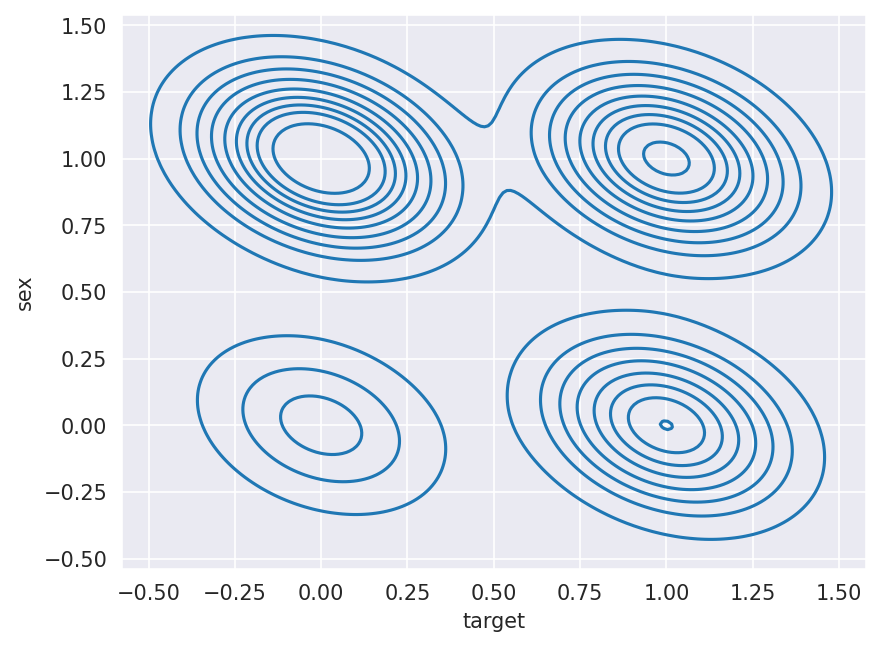

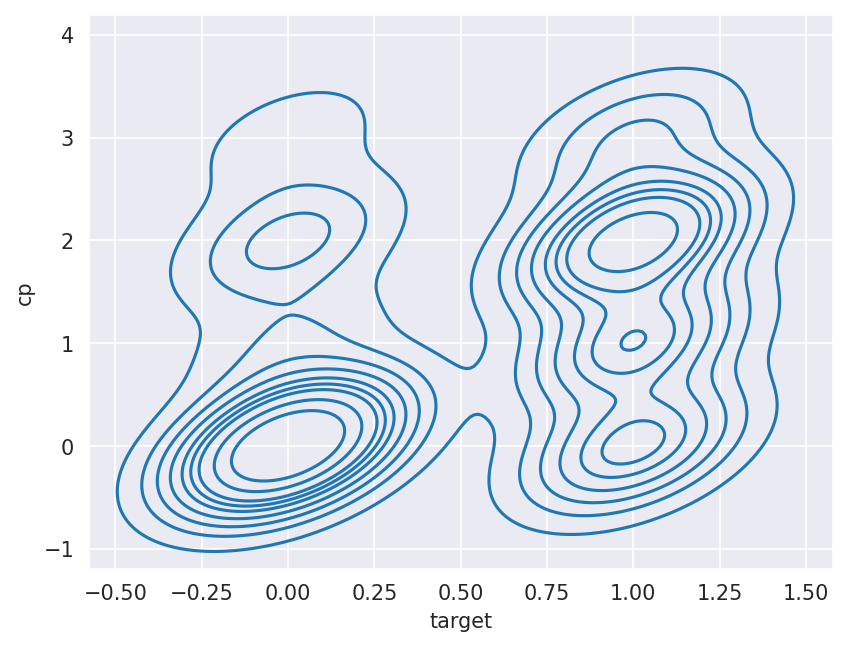

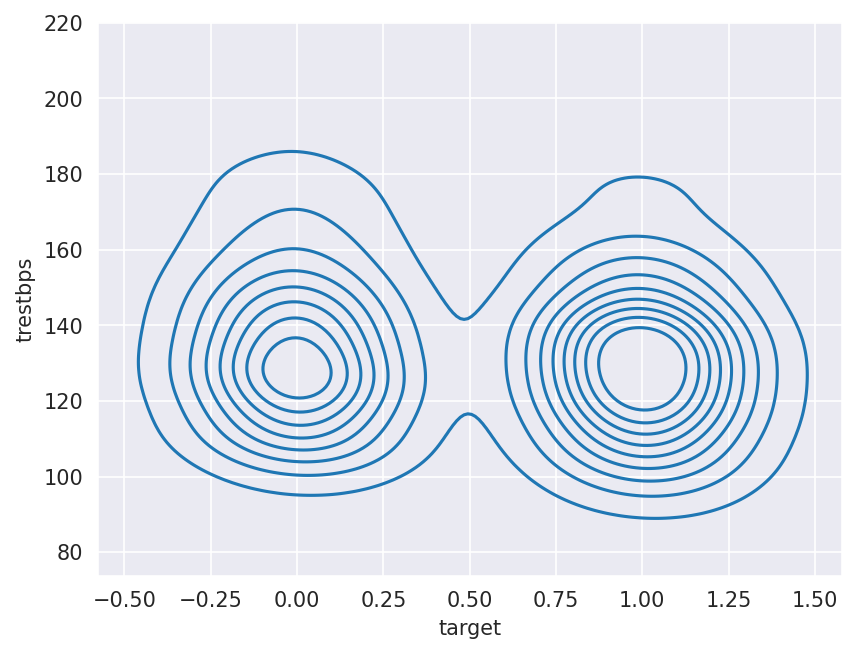

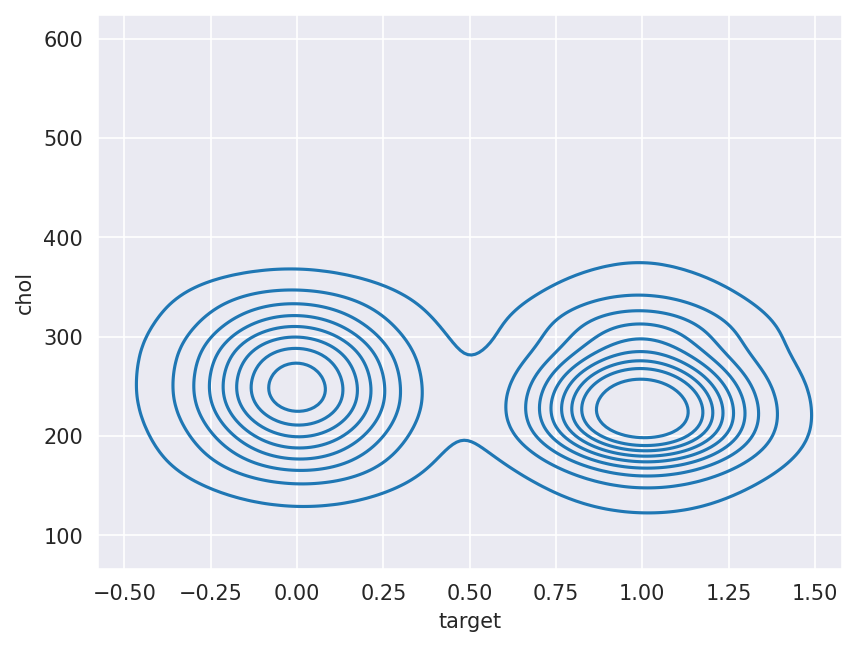

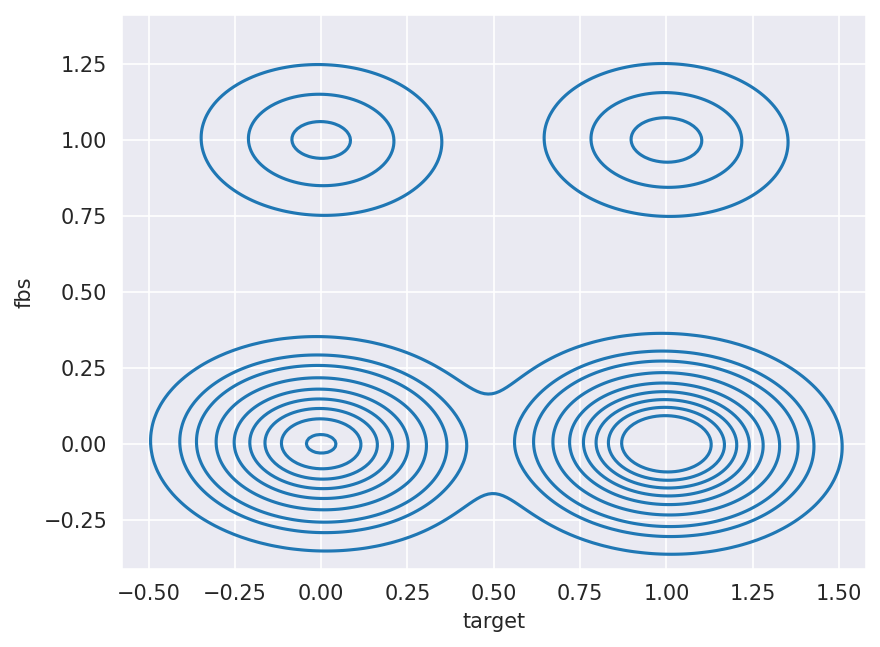

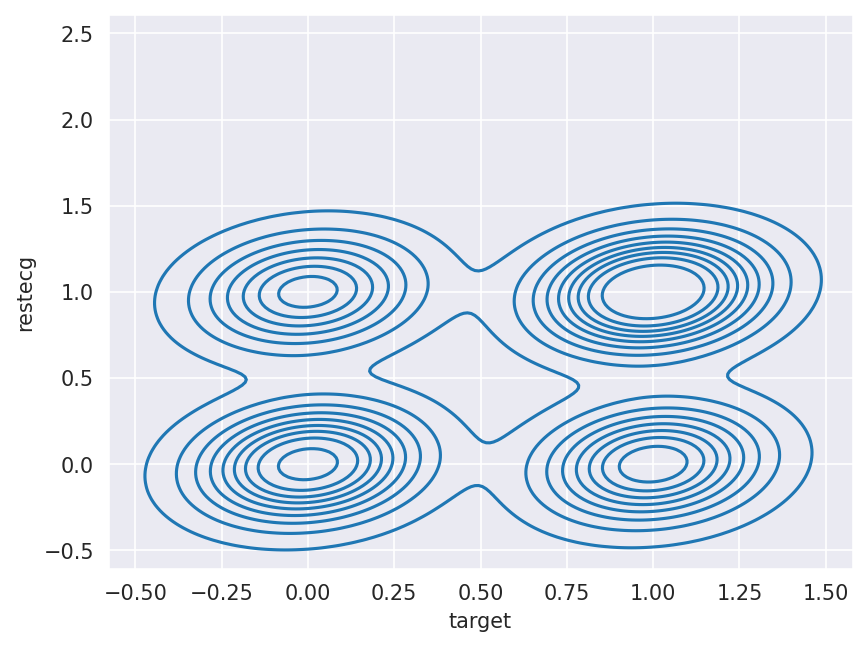

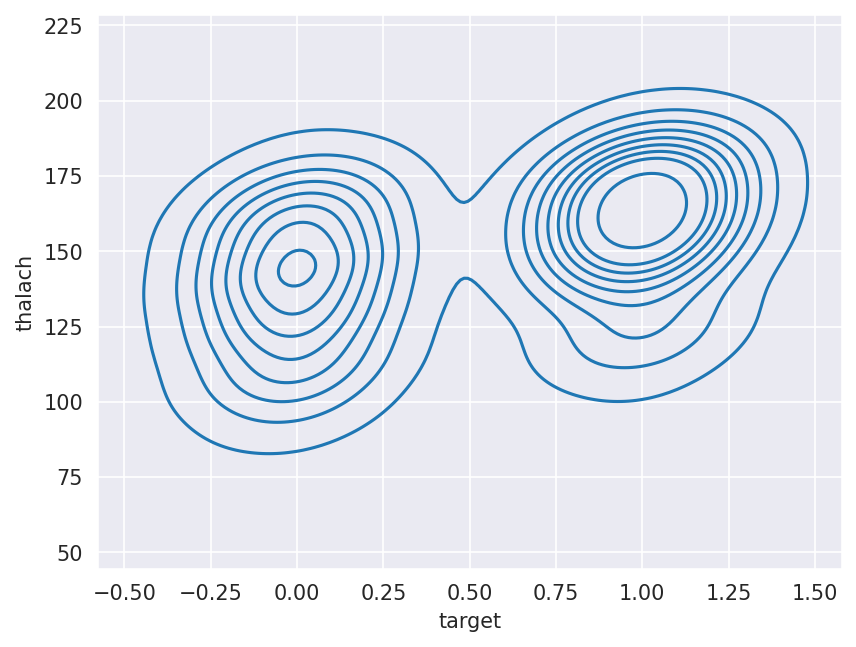

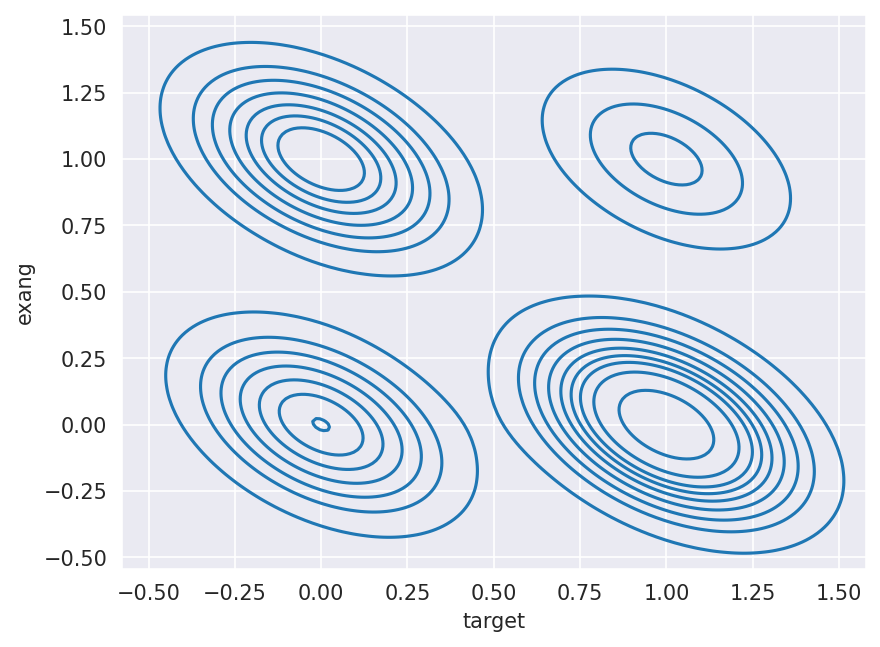

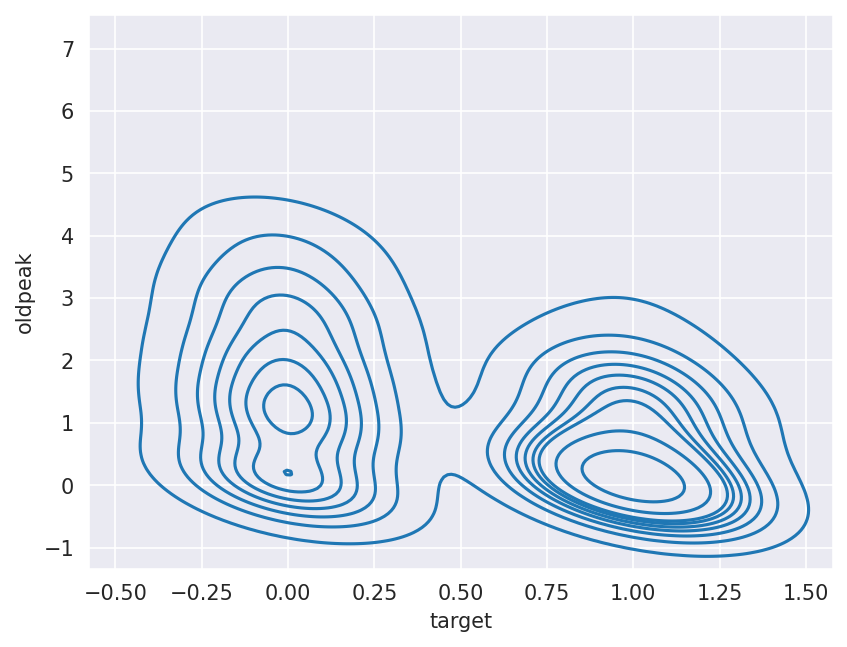

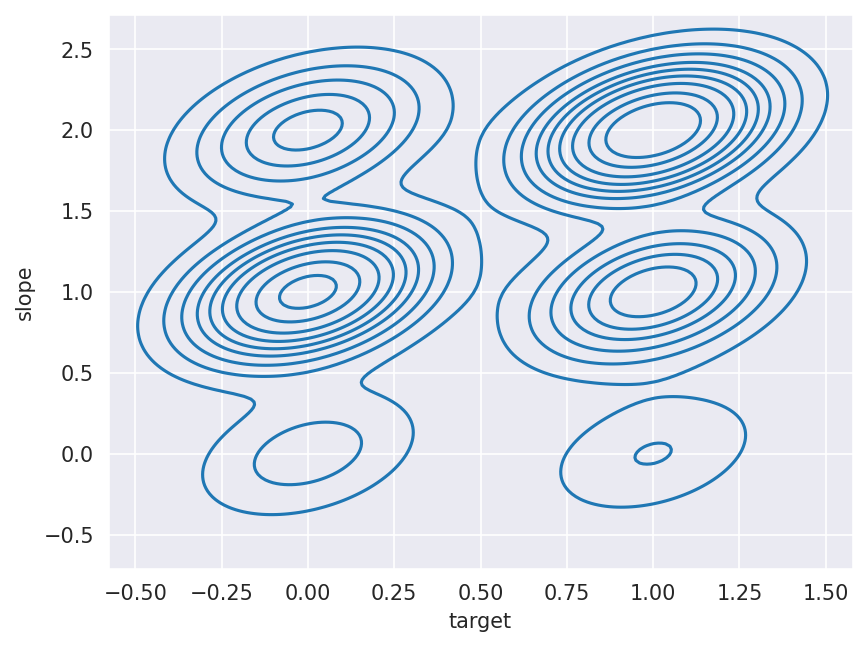

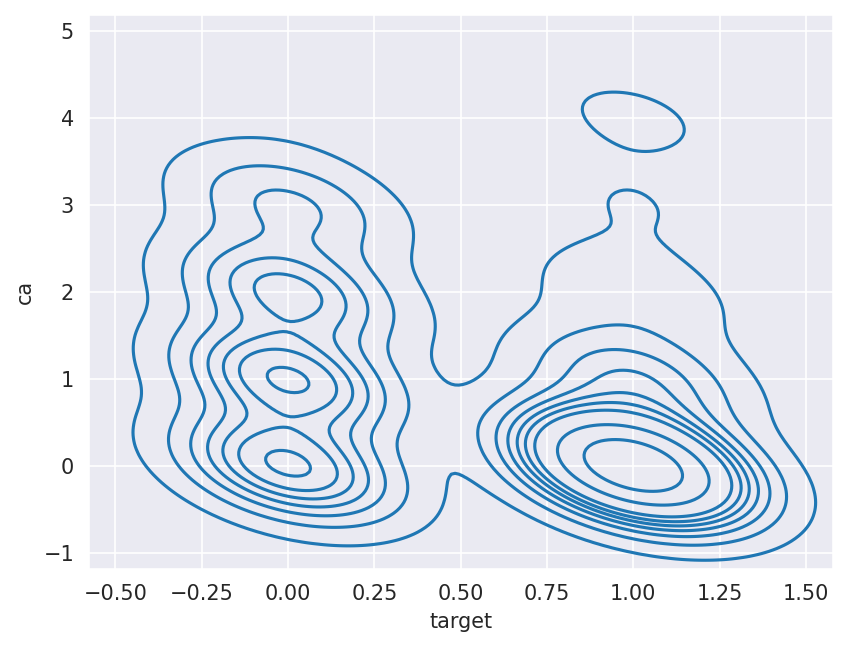

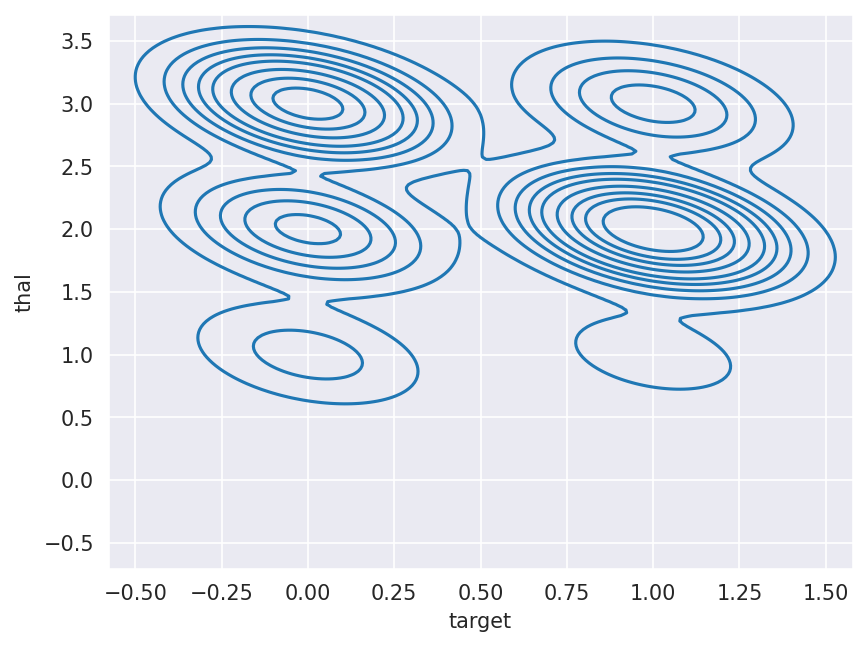

In [11]:
columns_to_plot = df.drop('target', axis=1).columns

for i, column in enumerate(columns_to_plot):
    row, col = divmod(i, grid_size[1])  
    with sns.axes_style('darkgrid'):
        plt.figure(dpi=150)
        sns.kdeplot(data=df, x='target', y=column)

plt.show()

## Scatter Plot

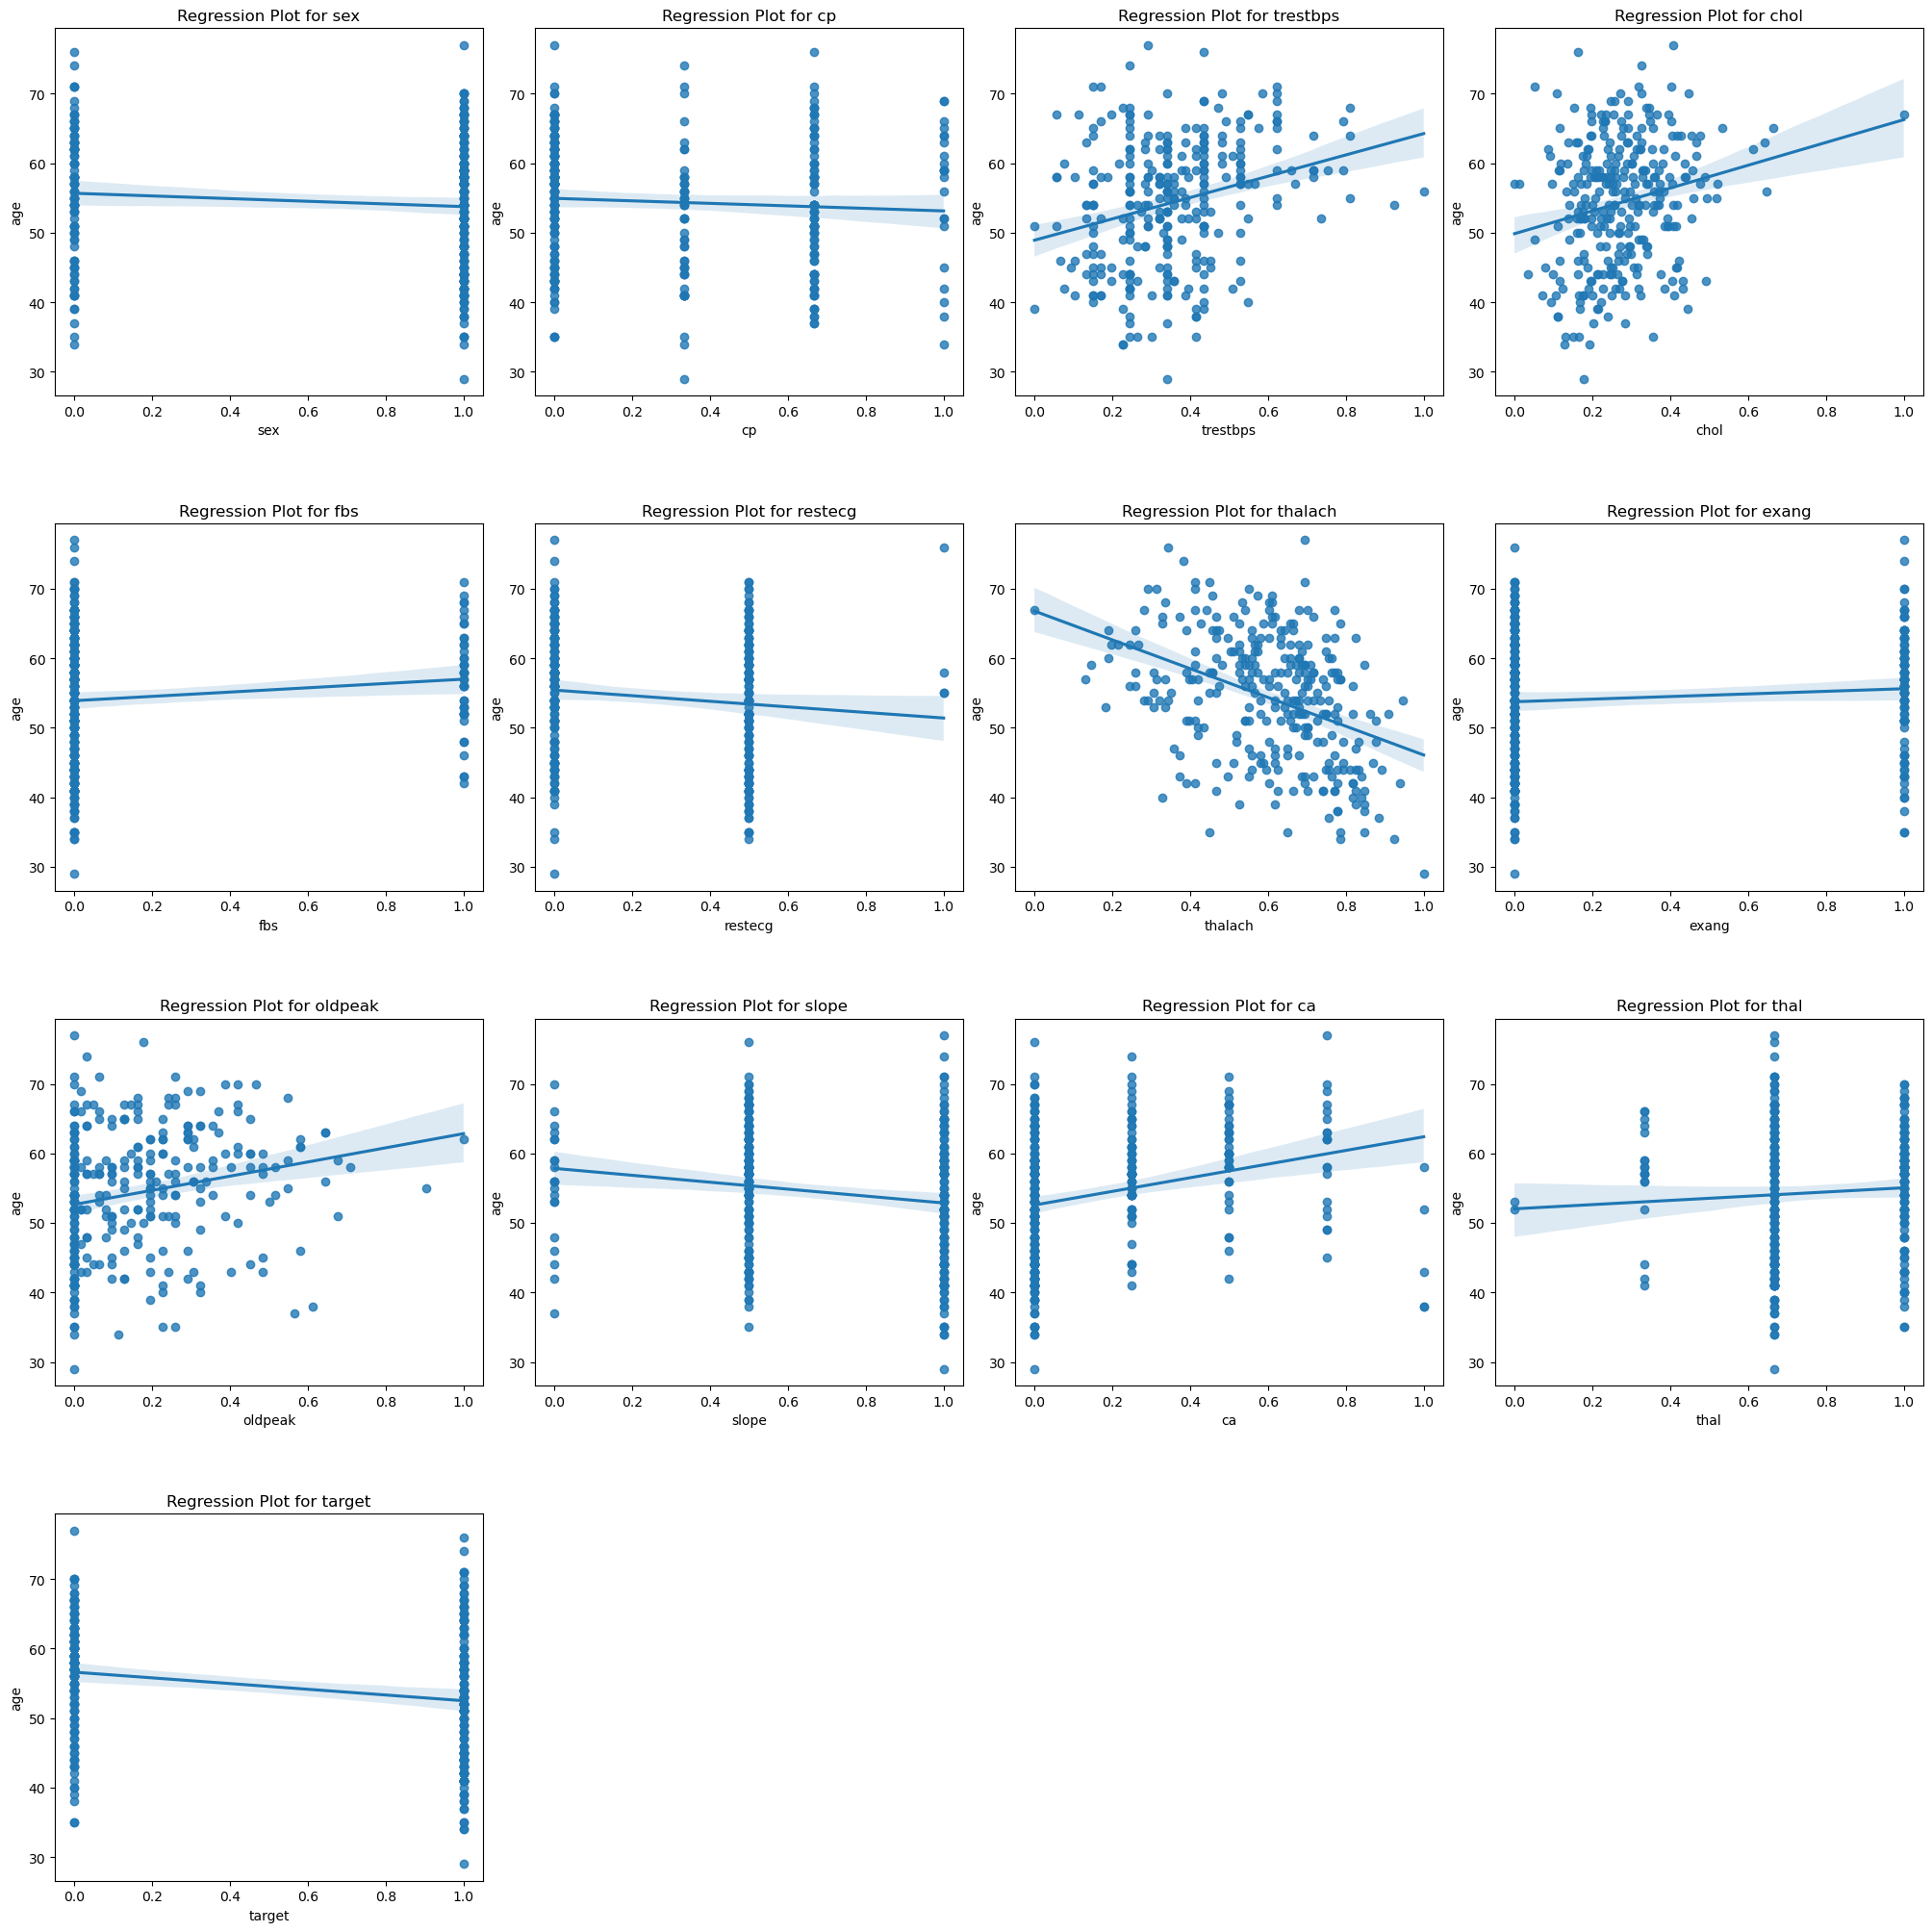

In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

columns_to_plot2 = df.drop('age', axis=1).columns
x = df.loc[:, columns_to_plot2]
y = df['age']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=columns_to_plot2)

num_cols = len(columns_to_plot)
num_rows = (num_cols + 3) // 4  

fig, axs = plt.subplots(ncols=4, nrows=num_rows, figsize=(20, 5 * num_rows))
axs = axs.flatten()

for i, k in enumerate(columns_to_plot2):
    sns.regplot(y=y, x=x[k], ax=axs[i])
    axs[i].set_title(f'Regression Plot for {k}')

for j in range(num_cols, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

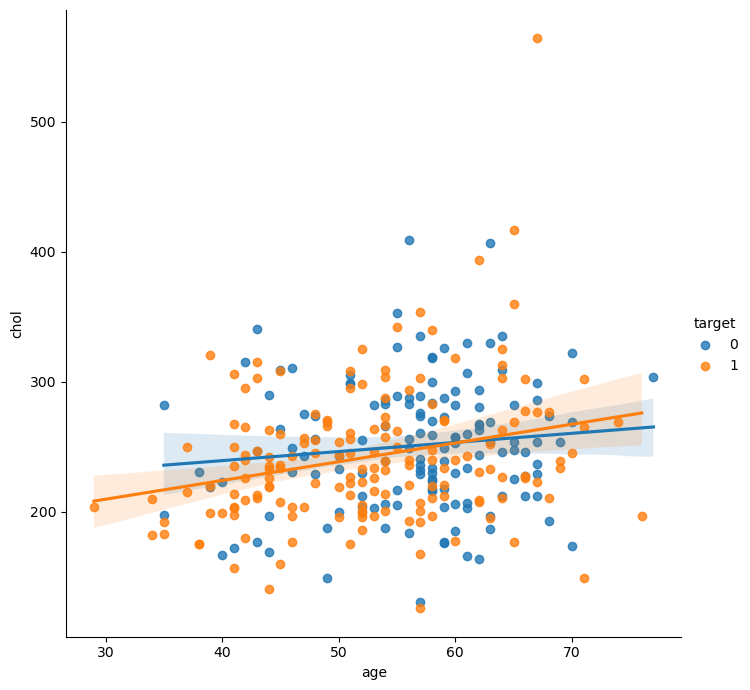

In [13]:
sns.lmplot(data=df, x='age', y='chol', hue='target', height=7, aspect=1)

## Error Bar Plot

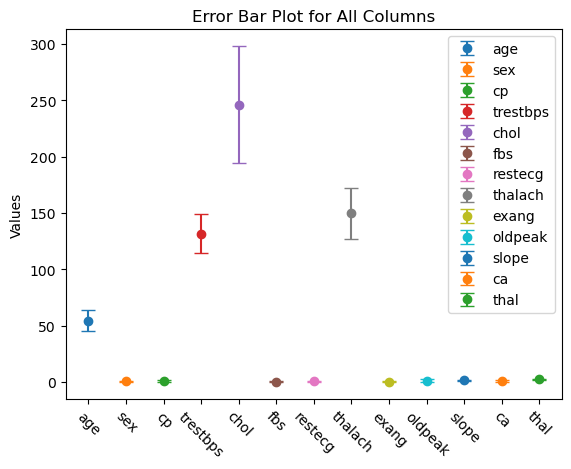

In [17]:
fig, ax = plt.subplots()


for i, column in enumerate(columns_to_plot):
    column_mean = df[column].mean()
    column_std = df[column].std()
    ax.errorbar(x=i, y=column_mean, yerr=column_std, fmt='o', label=column, capsize=5)

ax.set_xticks(range(len(columns_to_plot)))
ax.set_xticklabels(columns_to_plot, rotation=-45)

ax.set_ylabel('Values')
ax.set_title('Error Bar Plot for All Columns')


ax.legend()


plt.show()